<a href="https://colab.research.google.com/github/jenishbosco/Online-Payment-Fraud-Detection-System/blob/main/online_payment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import important libraries and Read dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#read dataset
data = pd.read_csv("onlinefraud.csv")
print(data.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0      0.0             0.0  
1  M2044282225             0.0             0.0      0.0             0.0  
2   C553264065             0.0             0.0      1.0             0.0  
3    C38997010         21182.0             0.0      1.0             0.0  
4  M1230701703             0.0             0.0      0.0             0.0  


In [ ]:
# check dataset has any null value or not
print (data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64


In [ ]:
# Exploring transaction type
print (data.type.value_counts())

PAYMENT     33529
CASH_OUT    25156
CASH_IN     16818
TRANSFER     7192
DEBIT         866
Name: type, dtype: int64


In [ ]:
type = data["type"].value_counts()
transactions = type.index
quantity = type.values
import plotly.express as px
figure = px.pie(data, values=quantity, names=transactions,hole = 0.5, title="Distribution of Transaction types")
figure.show()

In [ ]:
# check correlation b/w the feature of data with hte isFraud column

# checking correlation
correlation = data.corr()
print (correlation["isFraud"].sort_values(ascending=False))

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


In [ ]:
data["type"]= data["type"].map({"CASH_OUT": 1,"PAYMENT": 2,"CASH_IN":3,"TRANSFER":4,"DEBIT":5})
data["isFraud"]=data["isFraud"].map({0:"No Fraud",1:"Fraud"})
print (data.head())

   step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     2   9839.64  C1231006815       170136.0       160296.36   
1     1     2   1864.28  C1666544295        21249.0        19384.72   
2     1     4    181.00  C1305486145          181.0            0.00   
3     1     1    181.00   C840083671          181.0            0.00   
4     1     2  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0  No Fraud               0  
1  M2044282225             0.0             0.0  No Fraud               0  
2   C553264065             0.0             0.0     Fraud               0  
3    C38997010         21182.0             0.0     Fraud               0  
4  M1230701703             0.0             0.0  No Fraud               0  


In [ ]:
# splitting the data
from sklearn.model_selection import train_test_split
x = np.array(data[["type","amount","oldbalanceOrg","newbalanceOrig"]])
y = np.array(data[["isFraud"]])

In [ ]:
# training a machine learning model
from sklearn.tree import DecisionTreeClassifier
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.9997359578286932


In [ ]:
# prediction
# features=[type,amount,oldbalanceOrg,newbalanceOrig]
features= np.array([[4,9000.60,9000.60,0.0]])
print(model.predict(features))

['Fraud']


<AxesSubplot:xlabel='type', ylabel='count'>

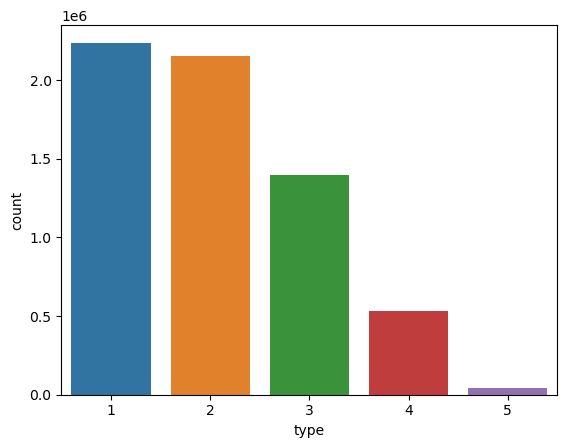

In [ ]:
sns.countplot(x='type', data=data)

<AxesSubplot:xlabel='type', ylabel='amount'>

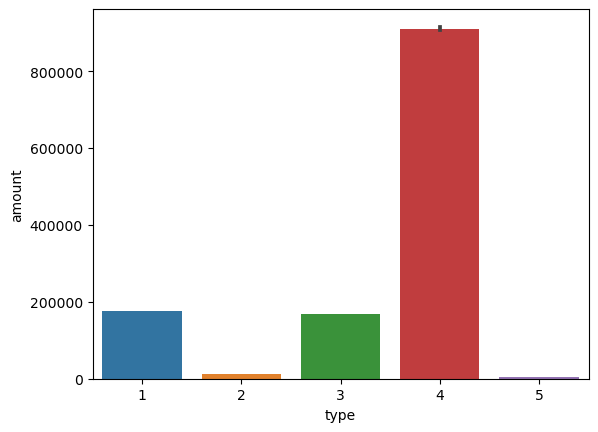

In [ ]:
sns.barplot(x='type', y='amount', data=data)

In [ ]:
data['isFraud'].value_counts()

No Fraud    6354407
Fraud          8213
Name: isFraud, dtype: int64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='step', ylabel='Density'>

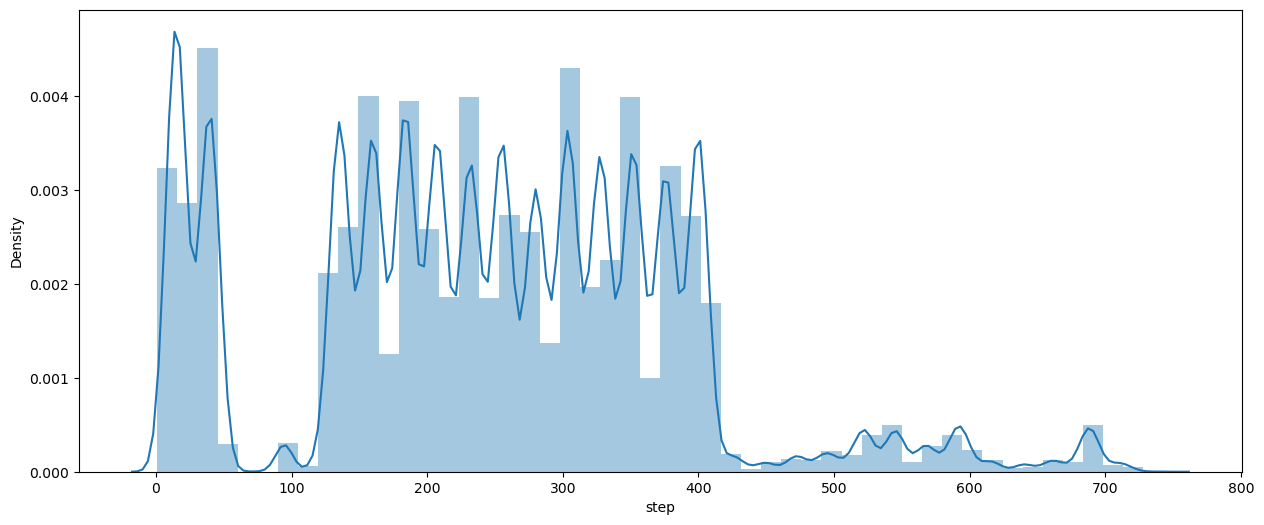

In [ ]:
plt.figure(figsize=(15, 6))
sns.distplot(data['step'], bins=50)

<AxesSubplot:>

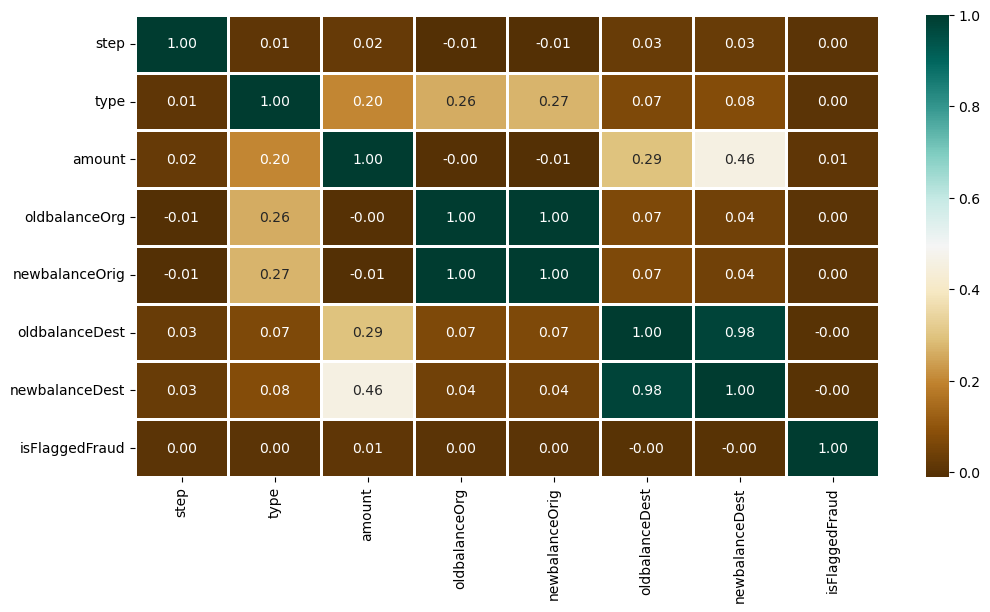

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(),

            cmap='BrBG',

            fmt='.2f',

            linewidths=2,

            annot=True)

In [ ]:
type_new = pd.get_dummies(data['type'], drop_first=True)

data_new = pd.concat([data, type_new], axis=1)
data_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,2,3,4,5
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,No Fraud,0,1,0,0,0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,No Fraud,0,1,0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud,0,0,0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud,0,0,0,0,0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,No Fraud,0,1,0,0,0
